In [15]:
from mpl_toolkits import mplot3d
from matplotlib.tri import Triangulation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

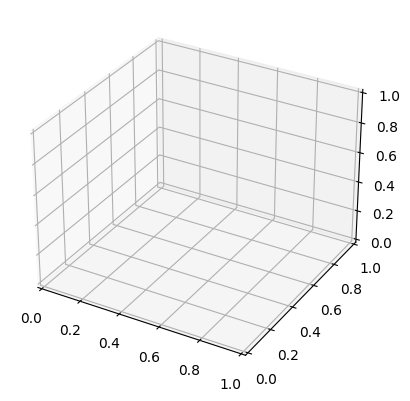

In [16]:
fig = plt.figure()
ax = plt.axes(projection="3d")
# with this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types.

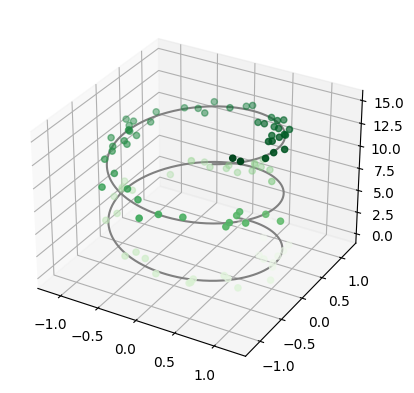

In [17]:
# three-dimensional points and lines
# the most three-dimensional plot is a line or collection of scatter plots created from sets of (x, y, z) triples.
# in analogy with the more common two-dimensional plot discussed earlier these can be created using the ax.plot3D and ax.scatter3D functions. the call signature for these is nearly identical to that of their two-dimensional counterparts.
# here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:
ax = plt.axes(projection="3d")
# data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, "gray")

# data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap="Greens")

In [18]:
# three-dimensional contour plots
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))


x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

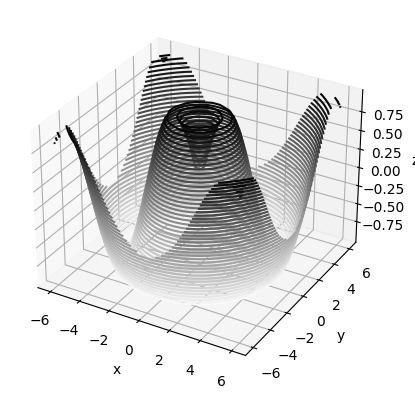

In [19]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.contour(X, Y, Z, 40, cmap="binary")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

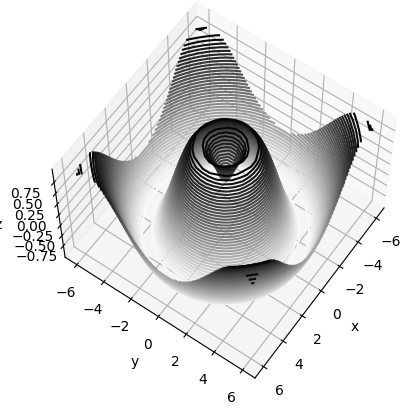

In [20]:
# to change the viewing angle we can use the view_init method
ax.view_init(60, 35)
fig

Text(0.5, 0.92, 'wireframe')

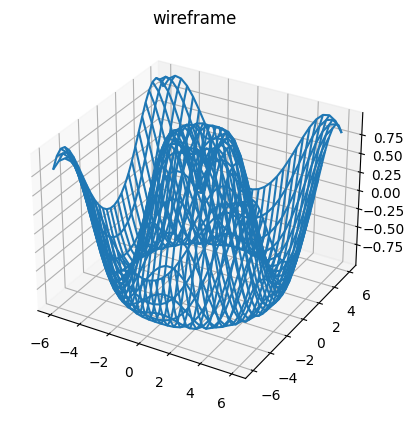

In [21]:
# wireframes and surface plots
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_title("wireframe")

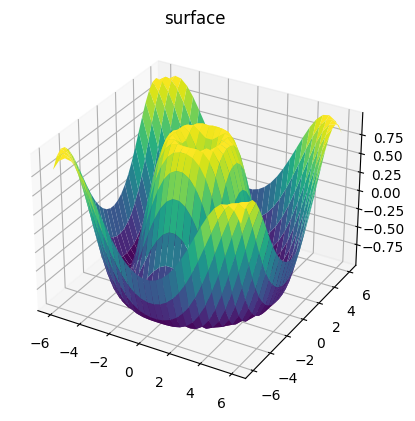

In [22]:
# a surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon adding a colormap to the filled polygons can add perception of the topology of the surface being visualized:
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_title("surface")

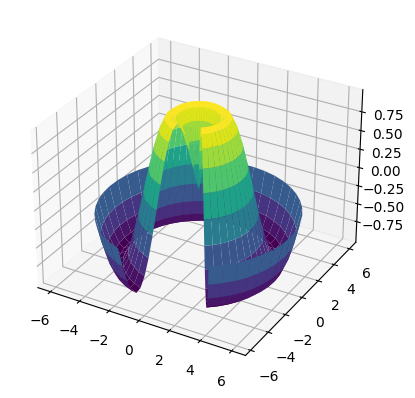

In [23]:
# we can use surface 3d function to plot a surface from a function:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none")

In [24]:
# surface triangulations
# for some applications the evenly sampled grids required by the preceding routines are too restrictive. so triangulation based plots can come in handy
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

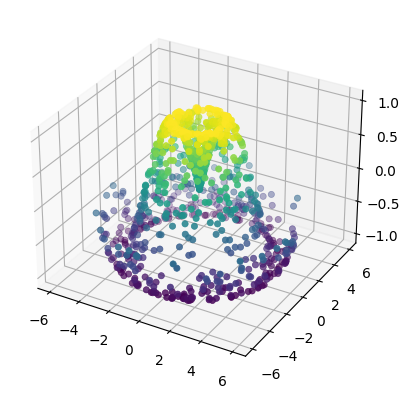

In [25]:
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, c=z, cmap="viridis", linewidth=0.5)

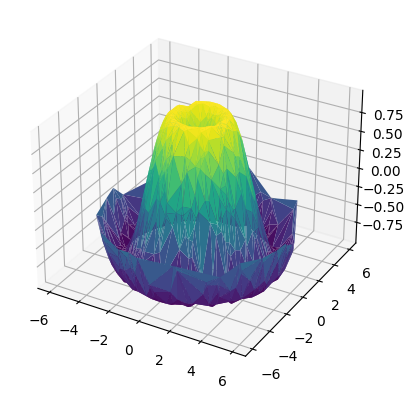

In [26]:
# this point cloud leaves a lot to be desired. the function that will help us in this case is ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):
ax = plt.axes(projection="3d")
ax.plot_trisurf(x, y, z, cmap="viridis", edgecolor="none")

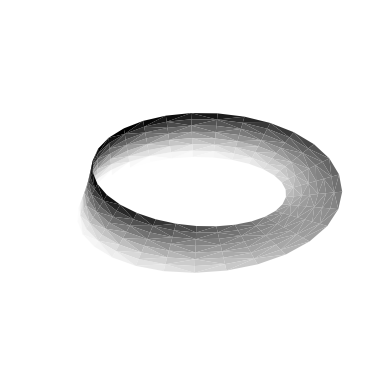

In [27]:
# example: visualizing a mobius strip
# a mobius strip is similar to a strip of paper glued into a loop with a half-twist. topologically it's quite interesting because despite appearances it has only a single side!
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
# from this parameterization, we must determine the (x, y, z) positions of the embedded strip:
# we must make two rotations. the first (computed by x) rotates the strip around the z-axis, and the second (computed by y) gives a half-twist to one end of the strip.
phi = 0.5 * theta
# now we use trig to derive the three-dimensional embedding we'll define r, the distance of each point from the center, and use this to find the embedded x, y, and z coordinates:
# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
# to plot the object we must make sure that the triangulation is correct. the best way to do this is to define the triangulation within the underlying parameterization, and then let matplotlib project this triangulation into the three-dimensional space of the mobius strip. this can be accomplished as follows:
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection="3d")
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap="Greys", linewidths=0.2)
ax.set_xlim(-1, 1), ax.set_ylim(-1, 1), ax.set_zlim(-1, 1)
ax.axis("off")